In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the config of the plots



Now we need to read in the data

In [4]:
df = pd.read_csv(r'C:\Users\AMAN JHA\movies.csv')

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Finding Missing data 

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [28]:
pd.set_option('display.max_rows', None)

Dropping Duplicate record if any

In [67]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Scatter plot with budget vs Gross correlation

<function matplotlib.pyplot.show(close=None, block=None)>

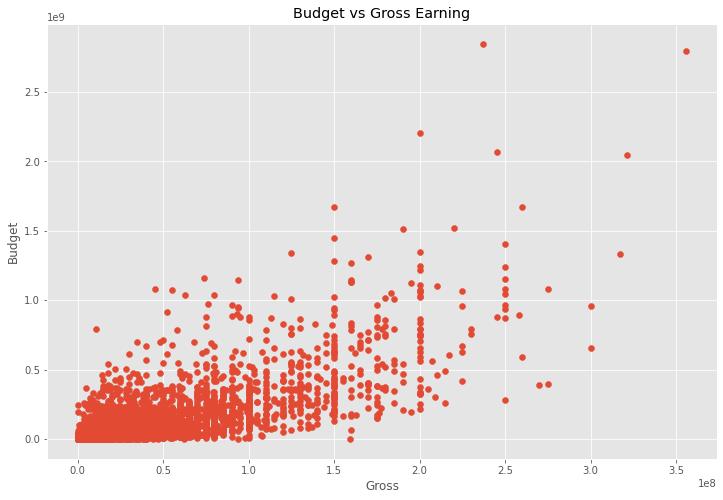

In [50]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show

Budget vs Gross using Seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

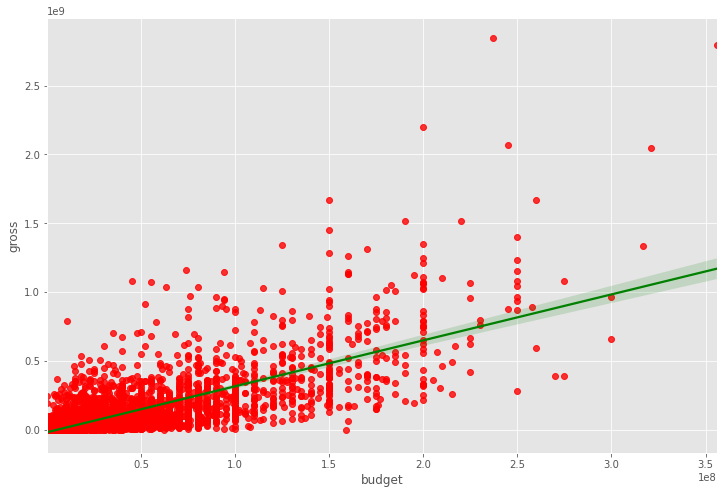

In [47]:
sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws= {'color':'r'}, line_kws= {'color': 'g'})

Looking at correlation for Numeric Field

In [48]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


Visualising Correlation Matrix in Heat map

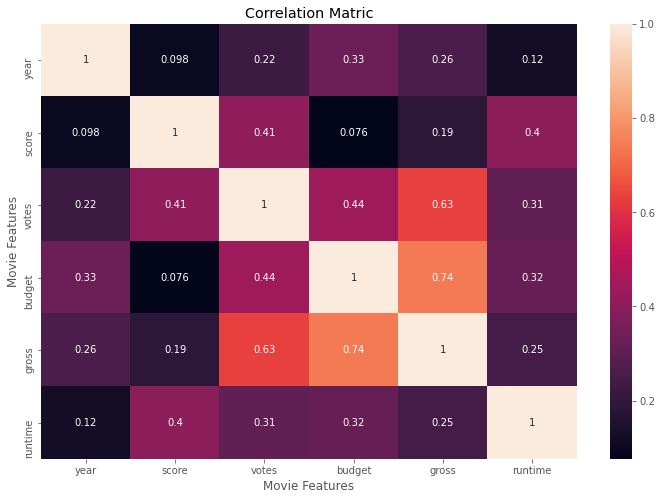

In [55]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Using factorize - this assigns a random numeric value for each unique categorical value

In [68]:
df_every_field = df.apply(lambda x: x.factorize()[0]).corr()

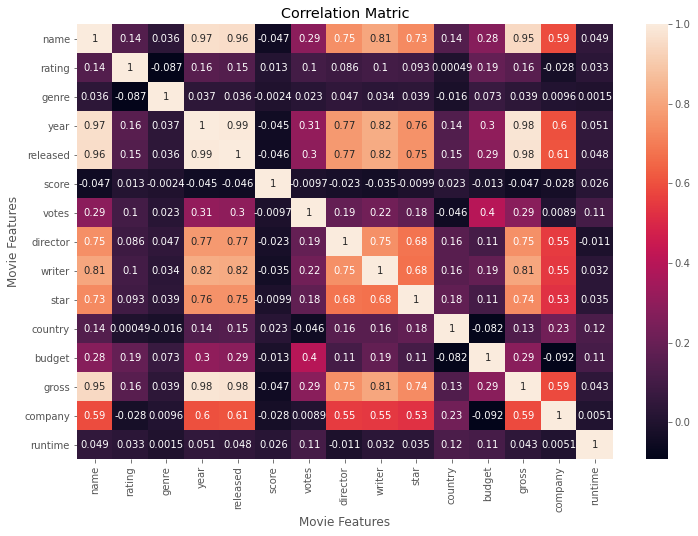

<Figure size 864x576 with 0 Axes>

In [59]:
sns.heatmap(df_every_field, annot=True)
plt.title('Correlation Matric')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()
plt.tight_layout()

Unstacking the data for better readability

In [60]:
df_every_field = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

corr_pairs = df_every_field.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.143938
          genre       0.036367
          year        0.965761
          released    0.959015
          score      -0.046733
          votes       0.287776
          director    0.745905
          writer      0.805211
          star        0.731565
          country     0.142828
          budget      0.277488
          gross       0.947324
          company     0.591667
          runtime     0.048955
rating    name        0.143938
          rating      1.000000
          genre      -0.086723
          year        0.156713
          released    0.146606
          score       0.012595
          votes       0.099972
          director    0.085520
          writer      0.103623
          star        0.093116
          country     0.000494
          budget      0.193353
          gross       0.158582
          company    -0.028035
          runtime     0.032741
genre     name        0.036367
          rating     -0.086723
        

Sorting the Data further

In [64]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    company    -0.092249
company   budget     -0.092249
genre     rating     -0.086723
rating    genre      -0.086723
budget    country    -0.082082
country   budget     -0.082082
gross     score      -0.047041
score     gross      -0.047041
          name       -0.046733
name      score      -0.046733
votes     country    -0.045914
country   votes      -0.045914
released  score      -0.045761
score     released   -0.045761
year      score      -0.044981
score     year       -0.044981
writer    score      -0.034685
score     writer     -0.034685
company   score      -0.028432
score     company    -0.028432
company   rating     -0.028035
rating    company    -0.028035
director  score      -0.022687
score     director   -0.022687
genre     country    -0.015795
country   genre      -0.015795
score     budget     -0.012642
budget    score      -0.012642
runtime   director   -0.011070
director  runtime    -0.011070
score     star       -0.009896
star      score      -0.009896
score   

Finding Highly Correlated Pairs

In [65]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company     0.527116
company   star        0.527116
          writer      0.546151
writer    company     0.546151
director  company     0.552258
company   director    0.552258
gross     company     0.588156
company   gross       0.588156
          name        0.591667
name      company     0.591667
year      company     0.601571
company   year        0.601571
released  company     0.607954
company   released    0.607954
writer    star        0.675685
star      writer      0.675685
director  star        0.682385
star      director    0.682385
name      star        0.731565
star      name        0.731565
gross     star        0.735680
star      gross       0.735680
director  name        0.745905
name      director    0.745905
writer    director    0.748340
director  writer      0.748340
gross     director    0.750911
director  gross       0.750911
released  star        0.754468
star      released    0.754468
year      star        0.756400
star      year        0.756400
year    